<a href="https://colab.research.google.com/github/mgrohnke/Homefield_Advantage_NFL/blob/main/Copy_of_NFL_2017_Season_Game_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import pandas
import pandas as pd

#read in the data
data = 'https://raw.githubusercontent.com/nfl-football-ops/Big-Data-Bowl/master/Data/games.csv'

games_df = pd.read_csv(data)

games_df.head()

,season,week,gameDate,gameId,gameTimeEastern,HomeScore,VisitorScore,homeTeamAbbr,visitorTeamAbbr,homeDisplayName,visitorDisplayName,Stadium,Location,StadiumType,Turf,GameLength,GameWeather,Temperature,Humidity,WindSpeed,WindDirection
0,2017,1,09/10/2017,2017091004,13:00:00,35,23,DET,ARI,Detroit Lions,Arizona Cardinals,Ford Field,"Detroit, MI",Indoors,Field Turf,03:26:00,Controlled Climate,68.0,70.0,NaN,NaN
1,2017,1,09/07/2017,2017090700,20:30:00,27,42,NE,KC,New England Patriots,Kansas City Chiefs,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,03:37:00,Clear and warm,63.0,77.0,8,SW
2,2017,1,09/10/2017,2017091003,13:00:00,18,21,CLE,PIT,Cleveland Browns,Pittsburgh Steelers,FirstEnergy,"Cleveland, Ohio",Outdoor,Grass,02:59:00,Sunny,63.0,53.0,11,East
3,2017,1,09/10/2017,2017091002,13:00:00,0,20,CIN,BAL,Cincinnati Bengals,Baltimore Ravens,Paul Brown Stadium,"Cincinnati, Ohio",Outdoor,UBU Sports Speed S5-M,02:57:00,Sunny,68.0,43.0,9,SE
4,2017,1,09/10/2017,2017091000,13:00:00,21,12,BUF,NYJ,Buffalo Bills,New York Jets,New Era Field,Orchard Park NY,Outdoors,A-Turf Titan,02:54:00,Sun & clouds,65.0,53.0,6,NNE


In [ ]:
# Stadium Type

In [ ]:
#Feature Engineering:

In [ ]:
#Drop columns that I will not be using for clarity

games_df.drop('season', axis= 1, inplace= True)
games_df.drop('week', axis= 1, inplace= True)
games_df.drop('gameId', axis= 1, inplace= True)
games_df.drop('visitorDisplayName', axis= 1, inplace= True)
games_df.drop('homeDisplayName', axis= 1, inplace= True)
games_df.drop('Location', axis= 1, inplace= True)
games_df.drop('GameLength', axis= 1, inplace= True)
games_df.drop('WindDirection', axis= 1, inplace= True)
games_df.drop('Stadium', axis= 1, inplace= True)
games_df.drop('Humidity', axis= 1, inplace= True)
games_df.drop('WindSpeed', axis= 1, inplace= True)

In [ ]:
#Create feature for whether the home team won

#Check for null values in the HomeScore and Visitor Score columns

games_df['HomeScore'].isnull().sum()
games_df['VisitorScore'].isnull().sum()

#Neither column have null values

#Create intermediate feature called HomeDif. The difference between HomeScore and VisitorScore

games_df['HomeDif'] = games_df['HomeScore'] - games_df['VisitorScore']

#Create feature called HomeWin.  If HomeDif is > 0, then the home team won.  Considering a tie as a loss for this test.

games_df.loc[games_df['HomeDif'] > 0, "HomeWin"] = "Won"
games_df.loc[games_df['HomeDif'] <= 0, "HomeWin"] = "Lost"

#Make sure feature was created correctly

games_df.head(10)

,gameDate,gameTimeEastern,HomeScore,VisitorScore,homeTeamAbbr,visitorTeamAbbr,StadiumType,Turf,GameWeather,Temperature,HomeDif,HomeWin
0,09/10/2017,13:00:00,35,23,DET,ARI,Indoors,Field Turf,Controlled Climate,68.0,12,Won
1,09/07/2017,20:30:00,27,42,NE,KC,Outdoor,Field Turf,Clear and warm,63.0,-15,Lost
2,09/10/2017,13:00:00,18,21,CLE,PIT,Outdoor,Grass,Sunny,63.0,-3,Lost
3,09/10/2017,13:00:00,0,20,CIN,BAL,Outdoor,UBU Sports Speed S5-M,Sunny,68.0,-20,Lost
4,09/10/2017,13:00:00,21,12,BUF,NYJ,Outdoors,A-Turf Titan,Sun & clouds,65.0,9,Won
5,09/10/2017,13:00:00,17,23,CHI,ATL,Outdoor,Grass,Sunny,64.0,-6,Lost
6,09/10/2017,13:00:00,16,26,TEN,OAK,Outdoors,Grass,Sunny,72.0,-10,Lost
7,09/10/2017,13:00:00,17,30,WAS,PHI,Outdoors,Grass,Sunny,67.0,-13,Lost
8,09/10/2017,13:00:00,7,29,HOU,JAX,Retractable Roof,Artificial,Sunny,80.0,-22,Lost
9,09/10/2017,16:25:00,17,9,GB,SEA,Outdoor,DD GrassMaster,Mostly Sunny,71.0,8,Won


In [ ]:
games_df['HomeWin'].value_counts()

Lost    46
Won     45
Name: HomeWin, dtype: int64

In [ ]:
#Check to see if any null values in "StadiumType" feature
games_df['StadiumType'].isnull().sum()

#There are 5 null values that we must drop from this data set
games_df = games_df.dropna(subset=['StadiumType'])

#Want "StadiumType" to be either 'Inside' or 'Outside', so need to see which values need to be replaced
games_df['StadiumType'].value_counts()

#Update each to either 'Outdoor' or 'Inside' and create this in a new feature "ST"
games_df['ST'] = games_df['StadiumType'].str.replace('Outdoors', 'Outdoor').str.replace('Indoors', 'Indoor').str.replace('Retractable Roof', 'Indoor').str.replace('Dome', 'Indoor').str.replace('Retr. Roof-Closed', 'Indoor').str.replace('Open', 'Outdoor').str.replace('Outddors', 'Outdoor').str.replace('Retr. Roof - Closed', 'Indoor').str.replace('Indoor, Open Roof', 'Indoor').str.replace('Indoor, Roof Closed', 'Indoor').str.replace('Domed, closed', 'Indoor').str.replace('Indoord, closed', 'Indoor').str.replace('Indoor, Outdoor Roof', 'Indoor')

games_df.head(10)



,gameDate,gameTimeEastern,HomeScore,VisitorScore,homeTeamAbbr,visitorTeamAbbr,StadiumType,Turf,GameWeather,Temperature,HomeDif,HomeWin,ST
0,09/10/2017,13:00:00,35,23,DET,ARI,Indoors,Field Turf,Controlled Climate,68.0,12,Won,Indoor
1,09/07/2017,20:30:00,27,42,NE,KC,Outdoor,Field Turf,Clear and warm,63.0,-15,Lost,Outdoor
2,09/10/2017,13:00:00,18,21,CLE,PIT,Outdoor,Grass,Sunny,63.0,-3,Lost,Outdoor
3,09/10/2017,13:00:00,0,20,CIN,BAL,Outdoor,UBU Sports Speed S5-M,Sunny,68.0,-20,Lost,Outdoor
4,09/10/2017,13:00:00,21,12,BUF,NYJ,Outdoors,A-Turf Titan,Sun & clouds,65.0,9,Won,Outdoor
5,09/10/2017,13:00:00,17,23,CHI,ATL,Outdoor,Grass,Sunny,64.0,-6,Lost,Outdoor
6,09/10/2017,13:00:00,16,26,TEN,OAK,Outdoors,Grass,Sunny,72.0,-10,Lost,Outdoor
7,09/10/2017,13:00:00,17,30,WAS,PHI,Outdoors,Grass,Sunny,67.0,-13,Lost,Outdoor
8,09/10/2017,13:00:00,7,29,HOU,JAX,Retractable Roof,Artificial,Sunny,80.0,-22,Lost,Indoor
9,09/10/2017,16:25:00,17,9,GB,SEA,Outdoor,DD GrassMaster,Mostly Sunny,71.0,8,Won,Outdoor


In [ ]:
#Lets look at a couple joint distributions of Stadium Type (ST) and whether the home team won (HomeWin)

#Joint Distribution with margins
ST_type_advtg = pd.crosstab(games_df['ST'], games_df['HomeWin'], margins= True)
print(ST_type_advtg)

HomeWin  Lost  Won  All
ST                     
Indoor     12   13   25
Outdoor    29   32   61
All        41   45   86


In [ ]:
#Joint Distribution with normalization
ST_type_advtg_norm = pd.crosstab(games_df['ST'], games_df['HomeWin'], normalize= 'index')*100
print(ST_type_advtg_norm)

HomeWin       Lost        Won
ST                           
Indoor   48.000000  52.000000
Outdoor  47.540984  52.459016


In [ ]:
#Appears to be no association between stadium type and home field advantage, but let's do a chi-square test

#Import the scipy.stats function
from scipy.stats import chi2_contingency

#Use chi2_contingency
g, p_val, dof, excpt = chi2_contingency(pd.crosstab(games_df['ST'], games_df['HomeWin']))

# Print out the p-value
print('The p-value is:', p_val)

The p-value is: 0.8422392500695783


In [ ]:
#p-value .842.  We fail to reject the null hypothesis and therefore conclude that there is no statistically signicant association between stadium type and home field advantage

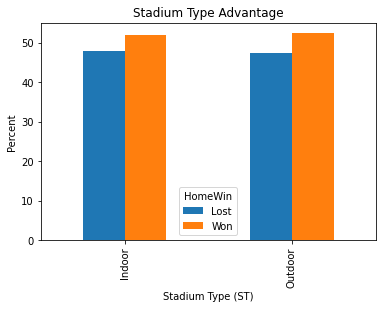

In [ ]:
#One final step: look at visualization
import matplotlib.pyplot as plt

ST_type_advtg_norm.plot(kind='bar');
plt.title("Stadium Type Advantage");
plt.xlabel("Stadium Type (ST)");
plt.ylabel("Percent");


In [ ]:
# gameDate exploration

In [ ]:
games_df.head(10)

,gameDate,gameTimeEastern,HomeScore,VisitorScore,homeTeamAbbr,visitorTeamAbbr,StadiumType,Turf,GameWeather,Temperature,HomeDif,HomeWin,ST
0,09/10/2017,13:00:00,35,23,DET,ARI,Indoors,Field Turf,Controlled Climate,68.0,12,Won,Indoor
1,09/07/2017,20:30:00,27,42,NE,KC,Outdoor,Field Turf,Clear and warm,63.0,-15,Lost,Outdoor
2,09/10/2017,13:00:00,18,21,CLE,PIT,Outdoor,Grass,Sunny,63.0,-3,Lost,Outdoor
3,09/10/2017,13:00:00,0,20,CIN,BAL,Outdoor,UBU Sports Speed S5-M,Sunny,68.0,-20,Lost,Outdoor
4,09/10/2017,13:00:00,21,12,BUF,NYJ,Outdoors,A-Turf Titan,Sun & clouds,65.0,9,Won,Outdoor
5,09/10/2017,13:00:00,17,23,CHI,ATL,Outdoor,Grass,Sunny,64.0,-6,Lost,Outdoor
6,09/10/2017,13:00:00,16,26,TEN,OAK,Outdoors,Grass,Sunny,72.0,-10,Lost,Outdoor
7,09/10/2017,13:00:00,17,30,WAS,PHI,Outdoors,Grass,Sunny,67.0,-13,Lost,Outdoor
8,09/10/2017,13:00:00,7,29,HOU,JAX,Retractable Roof,Artificial,Sunny,80.0,-22,Lost,Indoor
9,09/10/2017,16:25:00,17,9,GB,SEA,Outdoor,DD GrassMaster,Mostly Sunny,71.0,8,Won,Outdoor


In [ ]:
#Check to see if worth looking at timing in the season

games_df['gameDate'].value_counts()

09/17/2017    13
10/01/2017    13
09/24/2017    13
09/10/2017    12
10/15/2017    12
10/08/2017    11
09/11/2017     2
09/28/2017     1
10/05/2017     1
09/07/2017     1
10/12/2017     1
10/09/2017     1
09/14/2017     1
10/02/2017     1
09/25/2017     1
10/16/2017     1
09/21/2017     1
Name: gameDate, dtype: int64

In [ ]:
# Time zone exploration

In [ ]:
# read in data again into new DataFrame so that we do drop values based on stadium from previous analysis
gamesTZ_df = pd.read_csv(data)
gamesTZ_df.head(10)

,season,week,gameDate,gameId,gameTimeEastern,HomeScore,VisitorScore,homeTeamAbbr,visitorTeamAbbr,homeDisplayName,visitorDisplayName,Stadium,Location,StadiumType,Turf,GameLength,GameWeather,Temperature,Humidity,WindSpeed,WindDirection
0,2017,1,09/10/2017,2017091004,13:00:00,35,23,DET,ARI,Detroit Lions,Arizona Cardinals,Ford Field,"Detroit, MI",Indoors,Field Turf,03:26:00,Controlled Climate,68.0,70.0,NaN,NaN
1,2017,1,09/07/2017,2017090700,20:30:00,27,42,NE,KC,New England Patriots,Kansas City Chiefs,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,03:37:00,Clear and warm,63.0,77.0,8,SW
2,2017,1,09/10/2017,2017091003,13:00:00,18,21,CLE,PIT,Cleveland Browns,Pittsburgh Steelers,FirstEnergy,"Cleveland, Ohio",Outdoor,Grass,02:59:00,Sunny,63.0,53.0,11,East
3,2017,1,09/10/2017,2017091002,13:00:00,0,20,CIN,BAL,Cincinnati Bengals,Baltimore Ravens,Paul Brown Stadium,"Cincinnati, Ohio",Outdoor,UBU Sports Speed S5-M,02:57:00,Sunny,68.0,43.0,9,SE
4,2017,1,09/10/2017,2017091000,13:00:00,21,12,BUF,NYJ,Buffalo Bills,New York Jets,New Era Field,Orchard Park NY,Outdoors,A-Turf Titan,02:54:00,Sun & clouds,65.0,53.0,6,NNE
5,2017,1,09/10/2017,2017091001,13:00:00,17,23,CHI,ATL,Chicago Bears,Atlanta Falcons,Soldier Field,Chicago. IL,Outdoor,Grass,02:54:00,Sunny,64.0,57.0,10,SE
6,2017,1,09/10/2017,2017091007,13:00:00,16,26,TEN,OAK,Tennessee Titans,Oakland Raiders,Nissan Stadium,"Nashville, TN",Outdoors,Grass,02:59:00,Sunny,72.0,50.0,7,NE
7,2017,1,09/10/2017,2017091008,13:00:00,17,30,WAS,PHI,Washington Redskins,Philadelphia Eagles,FedExField,"Landover, MD",Outdoors,Grass,03:06:00,Sunny,67.0,54.0,5,North
8,2017,1,09/10/2017,2017091005,13:00:00,7,29,HOU,JAX,Houston Texans,Jacksonville Jaguars,NRG Stadium,"Houston, Texas",Retractable Roof,Artificial,03:06:00,Sunny,80.0,49.0,10,NNE
9,2017,1,09/10/2017,2017091010,16:25:00,17,9,GB,SEA,Green Bay Packers,Seattle Seahawks,Lambeau Field,"Green Bay, WI",Outdoor,DD GrassMaster,03:09:00,Mostly Sunny,71.0,49.0,11,S


In [ ]:
gamesTZ_df['homeTeamAbbr'].value_counts()

DEN    4
HOU    4
MIN    4
ATL    3
TB     3
DET    3
NE     3
NYJ    3
CIN    3
LAC    3
DAL    3
TEN    3
BAL    3
ARI    3
GB     3
IND    3
KC     3
WAS    3
LA     3
OAK    3
CHI    3
CAR    3
JAX    3
CLE    3
NO     2
SEA    2
PHI    2
MIA    2
BUF    2
SF     2
NYG    2
PIT    2
Name: homeTeamAbbr, dtype: int64

In [ ]:
#Look at time zone

#Create TimeZone feature specifying Eastern, Central, Mountain, or Pacific timezone for the home team of each game

gamesTZ_df.loc[gamesTZ_df['homeTeamAbbr'] == "MIN", "TimeZone"] = "Central"
gamesTZ_df.loc[gamesTZ_df['homeTeamAbbr'] == "HOU", "TimeZone"] = "Central"
gamesTZ_df.loc[gamesTZ_df['homeTeamAbbr'] == "DEN", "TimeZone"] = "Mountain"
gamesTZ_df.loc[gamesTZ_df['homeTeamAbbr'] == "NE", "TimeZone"] = "Eastern"
gamesTZ_df.loc[gamesTZ_df['homeTeamAbbr'] == "CAR", "TimeZone"] = "Eastern"
gamesTZ_df.loc[gamesTZ_df['homeTeamAbbr'] == "ARI", "TimeZone"] = "Mountain"
gamesTZ_df.loc[gamesTZ_df['homeTeamAbbr'] == "TB", "TimeZone"] = "Eastern"
gamesTZ_df.loc[gamesTZ_df['homeTeamAbbr'] == "LAC", "TimeZone"] = "Pacific"
gamesTZ_df.loc[gamesTZ_df['homeTeamAbbr'] == "OAK", "TimeZone"] = "Pacific"
gamesTZ_df.loc[gamesTZ_df['homeTeamAbbr'] == "DET", "TimeZone"] = "Eastern"
gamesTZ_df.loc[gamesTZ_df['homeTeamAbbr'] == "LA", "TimeZone"] = "Pacific"
gamesTZ_df.loc[gamesTZ_df['homeTeamAbbr'] == "NYJ", "TimeZone"] = "Eastern"
gamesTZ_df.loc[gamesTZ_df['homeTeamAbbr'] == "BAL", "TimeZone"] = "Eastern"
gamesTZ_df.loc[gamesTZ_df['homeTeamAbbr'] == "TEN", "TimeZone"] = "Central"
gamesTZ_df.loc[gamesTZ_df['homeTeamAbbr'] == "CLE", "TimeZone"] = "Eastern"
gamesTZ_df.loc[gamesTZ_df['homeTeamAbbr'] == "KC", "TimeZone"] = "Central"
gamesTZ_df.loc[gamesTZ_df['homeTeamAbbr'] == "GB", "TimeZone"] = "Central"
gamesTZ_df.loc[gamesTZ_df['homeTeamAbbr'] == "ATL", "TimeZone"] = "Eastern"
gamesTZ_df.loc[gamesTZ_df['homeTeamAbbr'] == "WAS", "TimeZone"] = "Eastern"
gamesTZ_df.loc[gamesTZ_df['homeTeamAbbr'] == "JAX", "TimeZone"] = "Eastern"
gamesTZ_df.loc[gamesTZ_df['homeTeamAbbr'] == "CHI", "TimeZone"] = "Central"
gamesTZ_df.loc[gamesTZ_df['homeTeamAbbr'] == "IND", "TimeZone"] = "Eastern"
gamesTZ_df.loc[gamesTZ_df['homeTeamAbbr'] == "DAL", "TimeZone"] = "Central"
gamesTZ_df.loc[gamesTZ_df['homeTeamAbbr'] == "CIN", "TimeZone"] = "Eastern"
gamesTZ_df.loc[gamesTZ_df['homeTeamAbbr'] == "SEA", "TimeZone"] = "Pacific"
gamesTZ_df.loc[gamesTZ_df['homeTeamAbbr'] == "SF", "TimeZone"] = "Pacific"
gamesTZ_df.loc[gamesTZ_df['homeTeamAbbr'] == "PIT", "TimeZone"] = "Eastern"
gamesTZ_df.loc[gamesTZ_df['homeTeamAbbr'] == "BUF", "TimeZone"] = "Eastern"
gamesTZ_df.loc[gamesTZ_df['homeTeamAbbr'] == "PHI", "TimeZone"] = "Eastern"
gamesTZ_df.loc[gamesTZ_df['homeTeamAbbr'] == "NYG", "TimeZone"] = "Eastern"
gamesTZ_df.loc[gamesTZ_df['homeTeamAbbr'] == "MIA", "TimeZone"] = "Eastern"
gamesTZ_df.loc[gamesTZ_df['homeTeamAbbr'] == "NO", "TimeZone"] = "Central"


In [ ]:
# Drop the unneeded columns
gamesTZ_df.drop('season', axis= 1, inplace= True)
gamesTZ_df.drop('week', axis= 1, inplace= True)
gamesTZ_df.drop('gameId', axis= 1, inplace= True)
gamesTZ_df.drop('visitorDisplayName', axis= 1, inplace= True)
gamesTZ_df.drop('homeDisplayName', axis= 1, inplace= True)
gamesTZ_df.drop('Location', axis= 1, inplace= True)
gamesTZ_df.drop('GameLength', axis= 1, inplace= True)
gamesTZ_df.drop('WindDirection', axis= 1, inplace= True)
gamesTZ_df.drop('Stadium', axis= 1, inplace= True)
gamesTZ_df.drop('Humidity', axis= 1, inplace= True)
gamesTZ_df.drop('WindSpeed', axis= 1, inplace= True)

In [ ]:
# Add in the HomeWin feature previously created

#Create intermediate feature called HomeDif. The difference between HomeScore and VisitorScore

gamesTZ_df['HomeDif'] = gamesTZ_df['HomeScore'] - gamesTZ_df['VisitorScore']

#Create feature called HomeWin.  If HomeDif is > 0, then the home team won.  Considering a tie as a loss for this test.

gamesTZ_df.loc[gamesTZ_df['HomeDif'] > 0, "HomeWin"] = "Won"
gamesTZ_df.loc[gamesTZ_df['HomeDif'] <= 0, "HomeWin"] = "Lost"

In [ ]:
gamesTZ_df.head(10)

,gameDate,gameTimeEastern,HomeScore,VisitorScore,homeTeamAbbr,visitorTeamAbbr,StadiumType,Turf,GameWeather,Temperature,TimeZone,HomeDif,HomeWin
0,09/10/2017,13:00:00,35,23,DET,ARI,Indoors,Field Turf,Controlled Climate,68.0,Eastern,12,Won
1,09/07/2017,20:30:00,27,42,NE,KC,Outdoor,Field Turf,Clear and warm,63.0,Eastern,-15,Lost
2,09/10/2017,13:00:00,18,21,CLE,PIT,Outdoor,Grass,Sunny,63.0,Eastern,-3,Lost
3,09/10/2017,13:00:00,0,20,CIN,BAL,Outdoor,UBU Sports Speed S5-M,Sunny,68.0,Eastern,-20,Lost
4,09/10/2017,13:00:00,21,12,BUF,NYJ,Outdoors,A-Turf Titan,Sun & clouds,65.0,Eastern,9,Won
5,09/10/2017,13:00:00,17,23,CHI,ATL,Outdoor,Grass,Sunny,64.0,Central,-6,Lost
6,09/10/2017,13:00:00,16,26,TEN,OAK,Outdoors,Grass,Sunny,72.0,Central,-10,Lost
7,09/10/2017,13:00:00,17,30,WAS,PHI,Outdoors,Grass,Sunny,67.0,Eastern,-13,Lost
8,09/10/2017,13:00:00,7,29,HOU,JAX,Retractable Roof,Artificial,Sunny,80.0,Central,-22,Lost
9,09/10/2017,16:25:00,17,9,GB,SEA,Outdoor,DD GrassMaster,Mostly Sunny,71.0,Central,8,Won


In [ ]:
TZ_advtg = pd.crosstab(gamesTZ_df['TimeZone'], gamesTZ_df['HomeWin'], margins= True)
print(TZ_advtg)

HomeWin   Lost  Won  All
TimeZone                
Central     10   15   25
Eastern     25   21   46
Mountain     2    5    7
Pacific      9    4   13
All         46   45   91


In [ ]:
TZ_advtg_norm = pd.crosstab(gamesTZ_df['TimeZone'], gamesTZ_df['HomeWin'], normalize= 'index')*100
print(TZ_advtg_norm)

HomeWin        Lost        Won
TimeZone                      
Central   40.000000  60.000000
Eastern   54.347826  45.652174
Mountain  28.571429  71.428571
Pacific   69.230769  30.769231


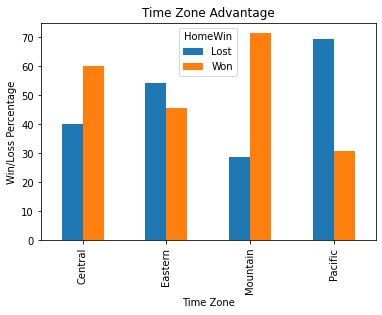

In [ ]:
TZ_advtg_norm.plot(kind='bar');
plt.title("Time Zone Advantage")
plt.xlabel("Time Zone")
plt.ylabel("Win/Loss Percentage");

In [ ]:
#Import the scipy.stats function
from scipy.stats import chi2_contingency

#Use chi2_contingency
g, p_val_TZ, dof, excpt = chi2_contingency(pd.crosstab(gamesTZ_df['TimeZone'], gamesTZ_df['HomeWin']))

# Print out the p-value
print('The p-value is:', p_val_TZ)

The p-value is: 0.20820817837944663
